<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/algo/ejemplo_lineal_grad_clase-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

La regresión lineal simple se basa en la función de hipótesis ℎ𝜃(𝑥), como veréis, muy similar a la de la recta:  
<img src="https://drive.google.com/uc?id=1cdgYDj_uzEHNHZrxvsVUfDMGK_pYFHi5">.



A su vez, esta función tiene un coste, que es exactamente la suma de los cuadrados de los errores frente a los datos reales. Para entendernos, la función de coste nos permite medir la diferencia entre los datos reales y los valores obtenidos de nuestra función hipótesis, y se calcula así:

<img src="https://drive.google.com/uc?id=1oGd1914F6doCiz_1b-QVcdsfuPFSNqGU">.

Así pues, el objetivo es encontrar el mínimo coste de nuestra función, que nos vendrá dado por unos valores concretos 𝜃0 y 𝜃1, que serán calculados a través del gradiente descendente. Este algoritmo es iterativo y trata de encontrar estos valores buscando que el gradiente (la inclinación o pendiente de la función de coste) prácticamente desaparezca.

Para ello, utilizaremos la regla de la cadena de las derivadas parciales. Esta regla se utiliza para derivar funciones compuestas y, como vais a ver, no es otra cosa que derivar la función y multiplicar por lo de dentro, en este caso, con la función de coste. Para la derivada del primer parámetro consideramos que se multiplica por 1 para poder implementar el algoritmo de manera vectorial si se desea.


<img src="https://drive.google.com/uc?id=1CK3UYyOfvvk61kMg2OA4LtrWGWQs-fxK">.

Una vez tenemos esto, solo quedaría iterar un número de veces que vendrá fijado por el criterio de convergencia 𝜖, el cual marcará la finalización de la iteración, y de un criterio de aprendizaje 𝛼, que determinará la manera de avanzar del algoritmo hacia la reducción de la función y será el número por el que se multiplique la regla de la cadena anterior tal que así:

<img src="https://drive.google.com/uc?id=1HHvDH3IvhAcAbKLR56O0SK8QA9tq084_">.

#EJEMPLO

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://drive.google.com/uc?id=1JyEVQ0k57fNzl9ZJJn0rJdHqu7K5cJ3-')

data.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [20]:
x = data['Height']
y = data['Weight']

In [21]:
def cost_function(theta0,theta1,x, y):
    return lambda theta0, theta1: np.sum((theta0 + theta1 * x - y) ** 2) / (2*len(x))

In [22]:
def derivative_theta_0(theta0,theta1,x, y):
    return lambda theta0, theta1: 1/len(x) * np.sum(theta0 + theta1 * x - y)

In [23]:
def derivative_theta_1(theta0,theta1, x, y):
    return lambda theta0, theta1: 1/len(x) * np.sum((theta0 + theta1 * x - y) * x)

In [24]:

def gradient_descent(x, y, theta0 = 0, theta1 = 0, iterations = 10000, alpha = 0.01, epsilon = 0.01):

    J = cost_function(theta0,theta1,x,y)
    J0 = derivative_theta_0(theta0,theta1,x,y)
    J1 = derivative_theta_1(theta0,theta1,x,y)

    convergence = False
    for i in range(0,iterations):
        cost = J(theta0,theta1)
        Jp0 = J0(theta0,theta1)
        Jp1 = J1(theta0,theta1)

        theta0 = theta0 - alpha * Jp0
        theta1 = theta1 - alpha * Jp1

        cost_new = J(theta0,theta1)
        if (np.abs(cost_new - cost) < epsilon):
          convergence = True
          break;
        cost = cost_new

    if convergence == True:
          print("Convergencia !")
          print("Theta0: " + str(theta0))
          print("Theta1: " + str(theta1))
          print(str(i) + " iterations")
          print("Cost: " + str(cost))
          return theta0,theta1

    else:
        return 0,0

In [25]:

th0, th1 = gradient_descent(x,y,theta0 = 0, theta1 = 0,alpha=0.25,epsilon=0.00000001)


Convergencia !
Theta0: -39.00953627948929
Theta1: 61.24053348906881
8541 iterations
Cost: 0.24969140618218005


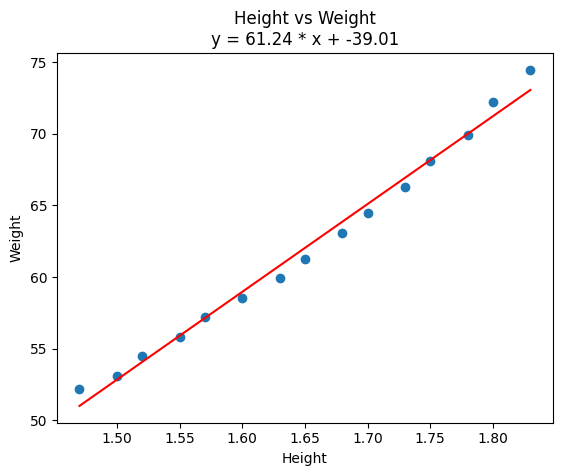

In [26]:
plt.plot(x,th1*x+th0,'r-')
plt.title('Height vs Weight\ny = ' + str(round(th1,2)) + ' * x + ' + str(round(th0,2)))
plt.xlabel('Height')
plt.ylabel('Weight')
plt.scatter(x, y)

In [27]:
ycalc= 61.24980824439948*x-39.024895914115824
sum_errores = np.sum((y-ycalc)**2)/len(x)
print(sum_errores)


0.49937667425215937


In [46]:
data1 = pd.read_csv('https://drive.google.com/uc?id=1JyEVQ0k57fNzl9ZJJn0rJdHqu7K5cJ3-')

In [35]:
# Preparamos oos datos.
def prepareData(data, n):
    """
    Add 1s column, convert to matrices,
    initialize theta.
    Args:
        data: dataframe
        n: int
    Returns:
        x: a m by n+1 matrix
        y: a m by 1 vector
        theta: a n+1 by 1 vector
    """
    # Insertamos la columna de 1's en el primer puesto.
    data.insert(0, 'Ones', 1)

    # Ya tenemos nuestros datos.
    x = data.iloc[:, 0:n+1]
    y = data.iloc[:, n+1:n+2]

    # Convertimos a matrices e inicializamos theta con 0s.
    # Theta is a vector [n + 1 x 1] y su traspuesto a vector [1 x n+1],
    # n es el número de características (var. predictoras).
    x = np.matrix(x.values)
    y = np.matrix(y.values)
    theta = np.matrix(np.zeros((n+1, 1)))
    return x, y, theta

In [36]:
# Cálculo de la función de coste.
def computeCost(x, y, theta):
    """
    Args:
        x: a m by n+1 matrix
        y: a m by 1 vector
        theta: a n+1 by 1 vector
    Returns:
        cost: float
    """
    m = len(x)
    cost = np.sum(np.square((x * theta) - y)) / (2*m)
    return cost

In [47]:
# Número de variables.
n = len(data1.columns)-1 # quitamos la columma objetivo (a predecir)

In [48]:
# Obtenemos la matriz X (con un 1 como primera columna, recordar)
x, y, theta = prepareData(data1, n)

In [49]:
# Revisemos las matrices.
print(x.shape, y.shape, theta.shape)
print(x[0:3,])

(15, 2) (15, 1) (2, 1)
[[1.   1.47]
 [1.   1.5 ]
 [1.   1.52]]


In [50]:
#veamos el coste inicial ( theta = 0s)
computeCost(x, y, theta)

np.float64(1949.9514633333333)

In [51]:
print(theta)

[[0.]
 [0.]]


Cost function of linear regression: In our example, we have just one input feature x₁. Let’s introduce another feature x₀=1 for all the training examples just to make the calculations convenient. So, the linear regression model can be formulated as follows:
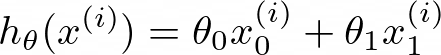


Linear regression uses mean squared error as the loss function which is given as follows over m examples:



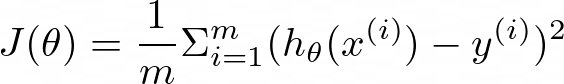

At every iteration, compute the gradient of J(θ) w.r.t all the parameters.
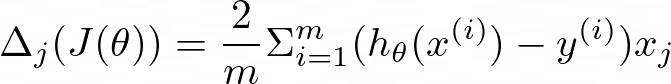

The above steps can be performed in one go using NumPy using vectorized notation as follows:
Note: If we are taking $\theta$ as a column vector, then it goes as $θ^{T}X$

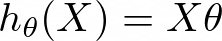

The gradient vector is computed as follows:  
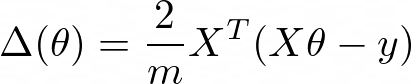

Update the parameters as follows:  

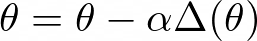

In [ ]:
def batchGD(X_b, y, theta, num_examples, num_iterations, alpha):
  plt.figure()
  past_costs = []
  past_thetas = [theta] # originally our initial values
  past_slopes = []
  past_biases = []
  plt.scatter(X,y, marker='o') # makes the base plot
  for iteration in range(num_iterations):
    gradients = 2/num_examples * X_b.T.dot(X_b.dot(theta) - y)
    prediction = np.dot(X_b, theta)
    error = prediction - y
    cost = 1/(2*num_examples) * np.dot(error.T,error) #np.dot(error.T,error) to calculate sqaured errors
    past_costs.append(cost)
    theta = theta - alpha * gradients # update parameters
    past_thetas.append(theta)
    past_slopes.append(theta[1])
    past_biases.append(theta[0])
    plot_data(X_b, y, theta)
    plt.title(f'Linear Regression with batch gradient descent with alpha = {alpha}')
  return past_thetas, past_costs, past_slopes, past_biases
    # plt.show()

In [42]:
def gradientDescent(x, theta, max_iter,epsilon = 10e-5):
    """

    Args:
        x: a m by n+1 matrix
        theta: a n+1 by 1 vector
        max_iter:max number of iterations in the algorithm
        epsilon: diference between two sucesive J (cost values)
    Returns:
        theta: a n+1 by 1 vector
        J_vals: a #iterations by 1 vector
        i: iteration at which convergence is obtained

    """
    m = len(x)
    J_vals = []
    prev = math.inf
    for i in range(max_iter):
        error = ((x * theta) - y)
        for j in range(len(theta.flat)):
            theta.T[0, j] = theta.T[0, j] - (alpha/m) * np.sum(np.multiply(error, x[:, j]))
        J_vals.append(computeCost(x, y, theta))
        if(abs( J_vals[i]- prev) < epsilon) :
            print("Convergencia Alcanzada !", i ," iteraciones")
            break
        prev = J_vals[i]
    return (theta, J_vals,i)



In [ ]:
gradients = 2/num_examples * X_b.T.dot(X_b.dot(theta) - y)
    prediction = np.dot(X_b, theta)
    error = prediction - y
    cost = 1/(2*num_examples) * np.dot(error.T,error) #np.dot(error.T,error) to calculate sqaured errors
    past_costs.append(cost)
    theta = theta - alpha * gradients # update parameters


In [ ]:
def gradientDescent1(x, theta, max_iter,epsilon = 10e-5):
    """


    m = len(x)
    J_vals = []
    prev = math.inf
    for i in range(max_iter):
        error = ((x * theta) - y)
        for j in range(len(theta.flat)):
            theta.T[0, j] = theta.T[0, j] - (alpha/m) * np.sum(np.multiply(error, x[:, j]))
        J_vals.append(computeCost(x, y, theta))
        if(abs( J_vals[i]- prev) < epsilon) :
            print("Convergencia Alcanzada !", i ," iteraciones")
            break
        prev = J_vals[i]
    return (theta, J_vals,i)

In [63]:
iterations = 10000
alpha = 0.25
epsilon = 0.00000001
n = len(data1.columns)-1
theta = np.matrix(np.zeros((2, 1)))
print(theta)

[[0.]
 [0.]]


In [64]:
theta, J_vals, iter= gradientDescent(x, theta, iterations,epsilon)
print(theta)

Convergencia Alcanzada ! 8541  iteraciones
[[-39.00953628]
 [ 61.24053349]]


In [ ]:
betaHat = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
print('coefficients: \n')
print(betaHat)

coefficients: 

[[-39.06195592]
 [ 61.27218654]]


In [ ]:
print(x[0:3,])

0    1.47
1    1.50
2    1.52
Name: Height, dtype: float64


In [ ]:
unos = np.ones(len(x))
A = np.column_stack((x,unos))
print('Matriz A\n',A[0:3,])

Matriz A
 [[1.47 1.  ]
 [1.5  1.  ]
 [1.52 1.  ]]


In [ ]:
c = np.dot(np.linalg.inv(np.dot(A.T,A)),np.dot(A.T,y))
print('Vector  c \n',c)

Vector  c 
 [ 61.27218654 -39.06195592]


In [ ]:
c1 = c[0]
c2 = c[1]
y_calc = c1*x+c2
suma_errores = np.sum((y-y_calc)**2)
print(suma_errores)

7.490558403882581


In [ ]:
print(suma_errores/len(x))

0.4993705602588387
